# import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import Data

In [2]:
heart_disease_df = pd.read_csv(r'C:\Users\Steve\OneDrive\Documents\GitHub\End-to-End-Machine-Learning\End-to-End-Machine-Learning\data\heart_disease_df_1.csv')

In [3]:
# Print the first 5 rows of the DataFrame
print(heart_disease_df.head())

# Print information about the DataFrame
print(heart_disease_df.info())

   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   52    1  0.0       125  212.0    0      1.0      168      0      NaN   
1   53    1  0.0       140  203.0    1      0.0      155      1      NaN   
2   70    1  0.0       145  174.0    0      1.0      125      1      NaN   
3   61    1  0.0       148  203.0    0      1.0      161      0      NaN   
4   62    0  0.0       138  294.0    1      1.0      106      0      NaN   

   slope  ca  thal  target  
0      2   2     3       0  
1      0   0     3       0  
2      0   0     3       0  
3      2   1     3       0  
4      1   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1076 non-null   int64  
 1   sex       1076 non-null   int64  
 2   cp        1023 non-null   float64
 3   trestbps  1076 non-null   int64  
 4   chol      1021 non-null

# Design and Exploration
In this initial chapter,you will engage in the foundational stages of any machine learning project: designing an end-to-end machine learning use case, exploratory data analysis, and data preparation. By the end of the chapter, you will have a solid understanding of the early stages of a machine learning project, from conceptualizing a use case to preparing the data for further processing and model training.

# check missing values, duplicates, unique values

In [16]:
# check for missing values
print(heart_disease_df.isnull().sum())

age            0
sex            0
cp            53
trestbps       0
chol          55
fbs            0
restecg       48
thalach        0
exang          0
oldpeak     1076
slope          0
ca             0
thal           0
target         0
dtype: int64


In [17]:
# check for duplicates
print(heart_disease_df.duplicated().sum())

638


In [19]:
#check for unique values
print(heart_disease_df.nunique())

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak       0
slope         3
ca            5
thal          4
target        2
dtype: int64


# visualization

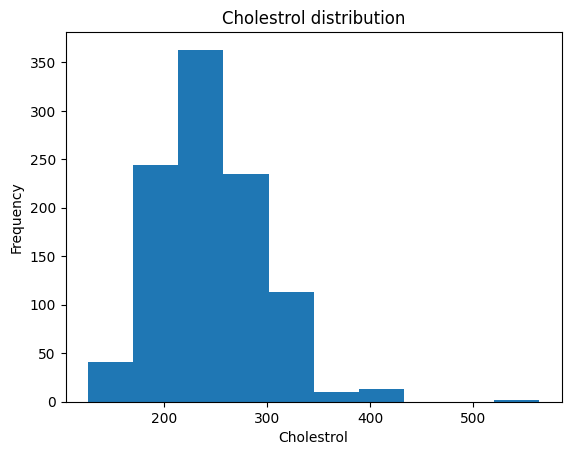

In [12]:
# Visualize the cholestrol column
heart_disease_df['chol'].plot(kind='hist')

# set theme

# Set the title and axis labels
plt.title('Cholestrol distribution')
plt.xlabel('Cholestrol')
plt.ylabel('Frequency')
plt.show()



In [13]:
# Print the sex value counts of the heart disease dataset (imbalance)
print(heart_disease_df['sex'].value_counts())

sex
1    743
0    333
Name: count, dtype: int64


fillna() fill missing , null or empty value in a DataFrame
drop_duplicates() Remove DataFrame rows or columns
value_counts() Count the frequence of items in a column (bias, imbalance)
drop() Remove repeated rows in DataFrame

# Imputation

In [15]:
from sklearn.impute import KNNImputer

In [ ]:
def impute_missing_values(df):

	#initialized KNNImputer
	imputer = KNNImputer(n_neighbors = 2, weights="uniform")

	#perform the imputation on your dataFrame
	#df_imputed['oldpeak'] = imputer.fit_transform(df['oldpeak'] # only 1 column
	df_imputed = imputer.fit_transform(df) # all columns
	
	return df_imputed

In [22]:
# Drop empty columns
heart_disease_column_dropped = heart_disease_df.drop(['oldpeak'], axis=1)

# Drop duplicate rows
heart_disease_duplicates_dropped = heart_disease_column_dropped.drop_duplicates()

In [23]:
# Calculate the mean value of the restecg column
mean_value = heart_disease_duplicates_dropped['restecg'].mean()

## To address the warning and ensure compatibility with future versions of pandas, you should avoid using chained assignment with inplace=True. Instead, assign the result back to the column directly. Here's how you can modify your code

In [26]:
# Impute missing values with the mean
heart_disease_duplicates_dropped['restecg'].fillna(mean_value, inplace=True) 

C:\Users\Steve\AppData\Local\Temp\ipykernel_68884\837466870.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_disease_duplicates_dropped['restecg'].fillna(mean_value, inplace=True)
C:\Users\Steve\AppData\Local\Temp\ipykernel_68884\837466870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_duplicates_dropped['restecg'].

## This approach directly assigns the result of fillna back to the restecg column, avoiding the use of inplace=True and adhering to the recommended practice to ensure compatibility with future versions of pandas.

In [27]:
# Fill NA/NaN values in the 'restecg' column with the mean value
heart_disease_duplicates_dropped['restecg'] = heart_disease_duplicates_dropped['restecg'].fillna(mean_value)

C:\Users\Steve\AppData\Local\Temp\ipykernel_68884\1425102666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_duplicates_dropped['restecg'] = heart_disease_duplicates_dropped['restecg'].fillna(mean_value)


## This approach makes it clear that you intend to modify the 'restecg' column for all rows in heart_disease_duplicates_dropped, potentially avoiding the SettingWithCopyWarning.
The warning indicates that heart_disease_duplicates_dropped might be a slice of another DataFrame, and when you try to modify it directly, pandas is unsure if it should modify the original DataFrame or just the slice. To ensure that your operation affects the intended DataFrame without ambiguity, use .loc to explicitly state that you're modifying a specific column for all rows. Here's how you can adjust your code:

In [32]:
# Use .loc to ensure the operation is performed directly on the DataFrame
heart_disease_duplicates_dropped.loc[:, 'restecg'] = heart_disease_duplicates_dropped['restecg'].fillna(mean_value)

In [33]:
print(heart_disease_duplicates_dropped['restecg'].isna().any())

False


# Model Training and Evaluation
This chapter will delve deep into the essential processes of model training and evaluation. It comprises four comprehensive lessons, focusing on various aspects of feature engineering, model training, logging experiments, and model evaluation.

## 1. Feature engineering and selection
Welcome back. Today, we will learn how to handle feature engineering and selection, a crucial step in the ML pipeline. Feature engineering builds upon data preparation; some data preparation steps overlap with feature engineering steps.

## 2. Feature engineering
Feature engineering is the process of creating features that enhance the performance of ML models. `Feature engineering techniques allow ML engineers to modify preexisting features, as well as design completely new ones, enabling the selection of a simpler model. This can lead to easier deployment and maintenance, faster training times, interpretability gain, and in some cases, improved model performance.` Remember, more isn't always better; it's about selecting the right features that capture the essential aspects of our data.

## 3. Normalization
One common feature engineering technique is normalization. Normalization scales numeric features to a scale of 0 to 1, ensuring that no particular feature can dominate the model due to its scale. This is beneficial when features have different ranges and you use algorithms sensitive to the inputs' scale like K-Nearest Neighbors (KNN) or Neural Networks. We can use the **sklearn.preprocessing.Normalizer** function for normalization. We first create a normalizer object and then pass our DataFrame as an argument, returning the normalized DataFrame.


## 4. Standardization
Another common feature engineering technique is standardization. Standardization scales features to have a mean of zero and a variance of one. **Standardization benefits algorithms that assume features are centered around zero and have variance in the same order**, like in Support Vector Machines (SVMs) and Linear Regression. We can use the **sklearn.preprocessing.StandardScaler** function for standardization. Similarly to normalization, we create a standard scaler object, pass our heart disease DataFrame as an argument, and get a standardized version of the data back.

## 5. What constitutes a good feature?
In order to improve our prediction accuracy, we need to use relevant features for modeling. It also doesn't help to use multiple features which represent similar metrics. For our heart disease dataset, it wouldn't be beneficial to include a feature like the weather on the day of appointment; this should have no bearing on the diagnosis. Furthermore, it isn't helpful to include both age in years and age in months as features, as both measures capture similar things. In this way, we can visualize dissimilar features as being perpendicular, or orthogonal to each other.

## 6. sklearn.feature_selection
A popular feature selection tool is sklearn's feature_selection. Feature_selection offers a robust toolbox that helps select significant, non-redundant features in our dataset. We need to split our data beforehand to avoid data leakage, ensuring that the model is not exposed to the test data during feature selection.

## 7. sklearn.feature_selection (cont.)
Sklearn-dot-feature_selection-dot-SelectFromModel is one helpful method for feature selection. We can use a Random Forest classifier as the underlying model to estimate the importance of each feature. The Random Forest model eliminates features considered irrelevant until it can no longer improve its target variable predictions. Prefit equals true tells SelectFromModel that the model has already been fitted. When constructing our Random Forest classifier, the parameters n_jobs equals -1 allows us to use all available processors on our machine, class_weight balances class frequencies, and max_depth limits the tree's depth to five. We use the dot-fit function to get critical features. In this scenario, heart_disease_x represents our features, while heart_disease_y signifies our target. Both need to be provided because the Random Forest classifier calculates feature importance based on the capability of the features x to predict the target y. The model-dot-get_support function returns a Boolean array that indicates which features are considered essential and which are not.

## 8. Let's practice!
Feature engineering and selection are vital steps in the ML pipeline. Correctly applying these techniques can simplify your model and boost its performance predicting heart disease. Now, it's time to showcase your new skills. Happy coding!

# exercice 2

In [34]:
heart_disease_duplicates_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 0 to 1015
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       438 non-null    int64  
 1   sex       438 non-null    int64  
 2   cp        389 non-null    float64
 3   trestbps  438 non-null    int64  
 4   chol      389 non-null    float64
 5   fbs       438 non-null    int64  
 6   restecg   438 non-null    float64
 7   thalach   438 non-null    int64  
 8   exang     438 non-null    int64  
 9   slope     438 non-null    int64  
 10  ca        438 non-null    int64  
 11  thal      438 non-null    int64  
 12  target    438 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 47.9 KB


In [35]:
# null values in the DataFrame
print(heart_disease_duplicates_dropped.isnull().sum())

age          0
sex          0
cp          49
trestbps     0
chol        49
fbs          0
restecg      0
thalach      0
exang        0
slope        0
ca           0
thal         0
target       0
dtype: int64


we 2 more feature with null values, we must perform the same imputing with mean values or using the KNNimputer (to be done lately)

In [37]:
# Calculate the mean value of the cp and chol columns
mean_value_cp = heart_disease_duplicates_dropped['cp'].mean()
mean_value_chol = heart_disease_duplicates_dropped['chol'].mean()

In [38]:
heart_disease_duplicates_dropped.loc[:, 'cp'] = heart_disease_duplicates_dropped['cp'].fillna(mean_value)
heart_disease_duplicates_dropped.loc[:, 'chol'] = heart_disease_duplicates_dropped['chol'].fillna(mean_value)

In [39]:
# Normalize the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

# Split the data
X_train, X_test = train_test_split(heart_disease_duplicates_dropped, test_size=0.2, random_state=42)

# Create normalizer object, fit on training data, normalize, and transform test set
norm = Normalizer()
X_train_norm = norm.fit_transform(X_train)
x_test_norm = norm.transform(X_test)

In [40]:
# standardization
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test = train_test_split(heart_disease_duplicates_dropped, test_size=0.2, random_state=42)

# Create standardizer object, fit on training data, to standardize it
sc = StandardScaler()

X_train_stdz = sc.fit_transform(X_train)

# Only standardize the test set data
X_test_stdz = sc.transform(X_test)

In [56]:
# sklearn feature selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# Splitting data into train and test subsets first to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(heart_disease_duplicates_dropped.drop('target', axis=1), heart_disease_duplicates_dropped['target'], test_size=0.2, random_state=42)


In [59]:
# Assuming X_train is derived from heart_disease_duplicates_dropped and has the columns used for training
# Define and fit the random forest model for feature selection to eliminate irrelevant features

rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
rf.fit(X_train, y_train)

# Define and run feature selection
model = SelectFromModel(rf, prefit=True)
features_bool = model.get_support()

# Apply the boolean mask to the correct set of columns (those used in X_train)
features = X_train.columns[features_bool] # This approach ensures that the boolean mask features_bool is applied to the set of columns that were actually used for training the model, thus avoiding the dimension mismatch error.